In [8]:
# First we do a set of imports
import csv
from pprint import pprint
import cinnabar
from cinnabar import plotting as cinnabar_plotting
from cinnabar import femap, stats

In [9]:
# read in the experimental data

experimental_data = {}
experimental_filename = 'experimental_core4_Mpocket_exclude18to23.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'lig_13': {'dG': -10.5, 'ddG': 0.0},
 'lig_27': {'dG': -10.02, 'ddG': 0.0},
 'lig_28': {'dG': -9.13, 'ddG': 0.0},
 'lig_29': {'dG': -9.56, 'ddG': 0.0},
 'lig_30': {'dG': -10.67, 'ddG': 0.0},
 'lig_31': {'dG': -9.55, 'ddG': 0.0},
 'lig_32': {'dG': -9.77, 'ddG': 0.0},
 'lig_33': {'dG': -10.75, 'ddG': 0.0},
 'lig_34': {'dG': -11.21, 'ddG': 0.0},
 'lig_35': {'dG': -10.42, 'ddG': 0.0},
 'lig_36': {'dG': -10.75, 'ddG': 0.0}}


In [10]:
# Read in calculated results

calculated_data = {}
calculated_filename = './final_results_ddg_core4_exclude18to23_cycle.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        tag = row[0] + "->" + row[1]
        calculated_data[tag] = {}
        calculated_data[tag]['ligand_i'] = row[0]
        calculated_data[tag]['ligand_j'] = row[1]
        calculated_data[tag]['dG'] = float(row[2])
        calculated_data[tag]['ddG'] = float(row[3])

pprint(calculated_data)

{'lig_13->lig_32': {'dG': 1.7,
                    'ddG': 0.5,
                    'ligand_i': 'lig_13',
                    'ligand_j': 'lig_32'},
 'lig_27->lig_13': {'dG': -2.0,
                    'ddG': 1.0,
                    'ligand_i': 'lig_27',
                    'ligand_j': 'lig_13'},
 'lig_28->lig_13': {'dG': -2.0,
                    'ddG': 1.0,
                    'ligand_i': 'lig_28',
                    'ligand_j': 'lig_13'},
 'lig_28->lig_31': {'dG': -1.0,
                    'ddG': 0.6,
                    'ligand_i': 'lig_28',
                    'ligand_j': 'lig_31'},
 'lig_28->lig_36': {'dG': 0.7,
                    'ddG': 0.4,
                    'ligand_i': 'lig_28',
                    'ligand_j': 'lig_36'},
 'lig_29->lig_27': {'dG': 0.9,
                    'ddG': 0.6,
                    'ligand_i': 'lig_29',
                    'ligand_j': 'lig_27'},
 'lig_30->lig_32': {'dG': 1.0,
                    'ddG': 0.1,
                    'ligand_i': 'lig_30',
    

In [11]:
cinnabar_filename = './final_results_ddg_core4_exclude18to23_cycle_cin.csv'

with open(cinnabar_filename, 'w') as f:
    f.write("# Experimental block\n")
    f.write("# Ligand, expt_DDG, expt_dDDG\n")
    for entry in experimental_data:
        dG = experimental_data[entry]['dG']
        ddG = experimental_data[entry]['ddG']
        f.write(f"{entry},{dG:.2f},{ddG:.2f}\n")
    f.write('\n')
    f.write('# Calculated block\n')
    f.write('# Ligand1,Ligand2,calc_DDG,calc_dDDG(MBAR),calc_dDDG(additional)\n')
    for entry in calculated_data:
        dG = calculated_data[entry]['dG']
        ddG = calculated_data[entry]['ddG']
        molA = calculated_data[entry]['ligand_i']
        molB = calculated_data[entry]['ligand_j']
        f.write(f"{molA},{molB},{dG:.2f},0,{ddG:.2f}\n")

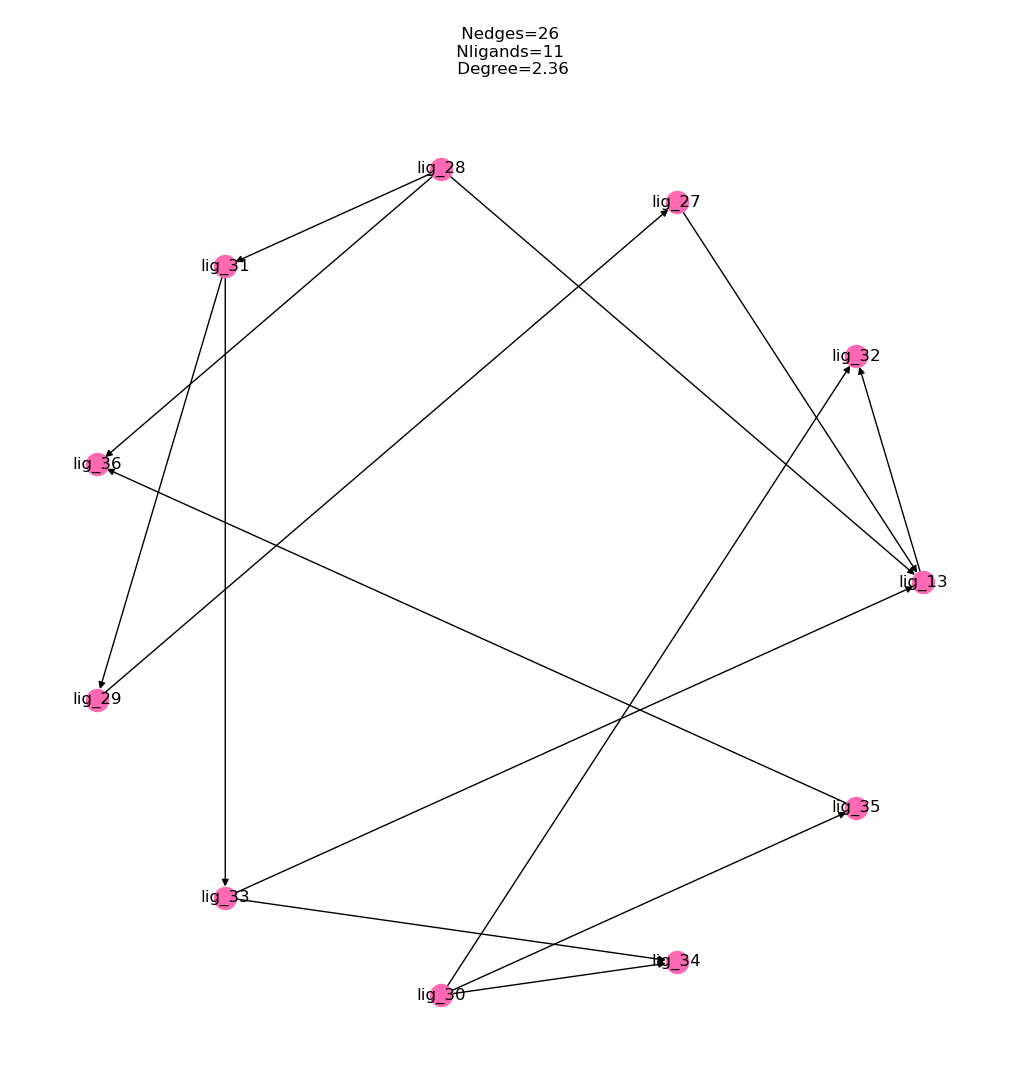

In [12]:
fe = femap.FEMap.from_csv('./final_results_ddg_core4_exclude18to23_cycle_cin.csv')
fe.generate_absolute_values()  # Get MLE generated estimates of the absolute values
fe.draw_graph()

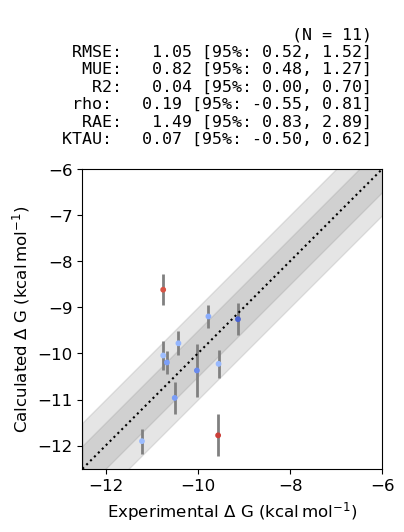

In [13]:
data = femap.read_csv('./final_results_ddg_core4_exclude18to23_cycle_cin.csv')
exp_DG_sum = sum([data['Experimental'][i].DG for i in data['Experimental'].keys()])
shift = exp_DG_sum / len(data['Experimental'].keys())

cinnabar_plotting.plot_DGs(fe.to_legacy_graph(), figsize=5,  shift=shift.m, filename='./core4_R2_exclude18to23_cycle_openfe.svg', xy_lim=[-12.5,-6])